In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in and preview the dataset
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


In [5]:
crimes["LOCATION"].unique()

array(['13600    MARINA POINT                 DR',
       '2500 S  SYCAMORE                     AV',
       '3300    SAN MARINO                   ST', ...,
       'NASSAU                       AV',
       '6200 W  78TH                         ST',
       '1000    MILWAUKEE                    AV'], dtype=object)

In [4]:
## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

In [5]:
# Preview the DataFrame to confirm the new column is correct
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR,17
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6


In [17]:
# check nans in the dataset
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex         32248
Vict Descent     32249
Weapon Desc     167901
Status Desc          0
LOCATION             0
HOUR OCC             0
Age Bracket      62273
dtype: int64

- it seems that there are some nan values in (Vict Sex, Vict Descent, Weapon Desc) columns

In [22]:
# so now I will impute this nans with "Unknown"
crimes.fillna(method="bfill", inplace=True)

In [23]:
# check if the imputing process is completed 
crimes.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     1
Status Desc     0
LOCATION        0
HOUR OCC        0
Age Bracket     0
dtype: int64

* now : `the dataset has no null values or nans`

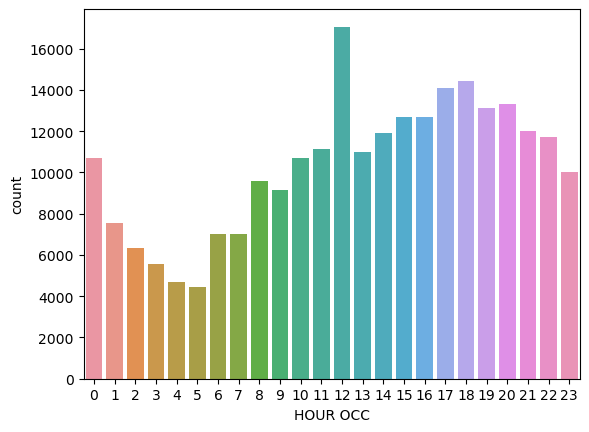

In [6]:
# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

In [7]:
# Midday has the largest volume of crime
peak_crime_hour = 12

* comment: `this means that most crimes occur in 12 midnight `

In [8]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

In [9]:
# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                        as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC", 
                        ascending=False).iloc[0]["AREA NAME"]


In [10]:
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Central


In [11]:
## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

In [12]:
# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

In [16]:
crimes["Age Bracket"].head()

0      NaN
1    26-34
2    55-64
3    26-34
4    35-44
Name: Age Bracket, dtype: category
Categories (7, object): ['0-17' < '18-25' < '26-34' < '35-44' < '45-54' < '55-64' < '65+']

In [13]:
# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Age Bracket, dtype: int64
